In [14]:
#Alina's code recoded to work with multiple images
import numpy as np
from PIL import Image
import json
import os
import matplotlib.pyplot as plt
from pathlib import Path

#is responsible for counting the holes and saving to a file the number and corresponding size of the holes in a boolean array
class Material:

    
    def __init__(self, matrix, filename):
        """ The __init__ function takes in two variables
        
        Args:
            matrix: boolean matrix, that represents the twodimensional material and corresponds to ONE output of the neural network
            filename: the json file, which contains the information about the already examined matrices    
        
        """
        self.matrix = matrix
        self.visited = np.zeros_like(matrix, dtype=bool)
        self.filename = filename
        self.holes = {}



    
    def depth_first_search(self, i, j):
        """The following method contains an algorithm which starts at a given point and checks the sorroundings
        In this case it is used on an already found method in the search() - method

        Args: 
            i: The row of the "root node"
            j: The column of the "root node"

        Returns:
            count: The variable that contains the size of the examined cavity.
        """
        if i < 0 or i >= len(self.matrix) or j < 0 or j >= len(self.matrix[0]) or self.visited[i][j] or not self.matrix[i][j]:
            return 0

        self.visited[i][j] = True
        count = 1

        for di, dj in [(0, 1), (1, 0), (0, -1), (-1, 0)]:
            count += self.depth_first_search(i + di, j + dj)

        return count

    def search(self):
        """This functions searches the boolean matrix for the entry 'True'
        and when one is found the method depth_first_search() is being called.

        Eventually it increases the value at the given key "size" by one.
        """
        for i in range(len(self.matrix)):
            for j in range(len(self.matrix[0])):
                if self.matrix[i][j] and not self.visited[i][j]:
                    size = self.depth_first_search(i, j)
                    if size in self.holes:
                        self.holes[size] += 1
                    else:
                        self.holes[size] = 1

    def main(self):
        """The main function calls the method search(),
        prints the dictionary
        and saves the dictionary in the json-file.
        """
        self.search()

In [15]:
#converts an image to an array
def convert_to_tensor(path):
    """
    This function converts a given image into a 3 dimensional array. It serves only as a helperfunction.

    Args:
        path: string, the path to the imagefile
    Returns:
        tensor: the converted image as a 3 dimensional array
    """
    image = Image.open(path)
    converted = np.asarray(image)
    return converted

#converting an rgb image to a boolean array
def convert_to_black(self, path):
    """
    This function converts a given rgb image into a 2 dimensional array, where black pixels get the value 1
    and all other pixels get the value 0

    Args:
        path: string, the path to the imagefile
    Returns:
        black_and_white: the image converted into a 2 dimensional array with boolean inputs
    """
    tensor = convert_to_tensor(path)
    black_and_white = np.empty((64,64), dtype = bool)

#for threshholding sharpness change the if statement
    for m in range(64):
        for n in range(64):
            if tensor[m,n,0]==0 and tensor[m,n,1]==0 and tensor[m,n,2]==0:
                black_and_white[m,n] = True
            else: black_and_white[m,n] = False
    return black_and_white

#converts a black and white image to a boolean array
def convert_to_boolean(path):
    """
    This function converts a given black and white image into a 2 dimensional array, where black pixels get the value 1
    and all other pixels get the value 0

    Args:
         path: string, the path to the imagefile
    Returns:
        black_and_white: the image converted into a 2 dimensional array with boolean inputs
    """
    
    tensor = convert_to_tensor(path)
    black_and_white = np.empty((64,64), dtype = bool)

#for threshholding sharpness change the if statement
    for m in range(64):
        for n in range(64):
            if tensor[m,n].all() ==0:
                black_and_white[m,n] = True
            else: black_and_white[m,n] = False
    return black_and_white

In [16]:
#getting all filepaths in a folder
def file_paths(folder):
    """
    This function collects all filepaths of .png files of a given folder

    Args:
        folder: string, the folder to collect paths from
    Returns: 
        an array consisting of all filepaths in the folder
    """
    paths = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(".png"):
                paths.append(os.path.join(root, file))
    return paths

In [17]:
#iterating holecounter over all images in a file and storing holecount into a single json file
def iterating(folder, filename):
    """
    Function that puts all the previous functions together, by counting all holes in all the images

    Args:
        folder: string, the path of the folder containing the images
        filename: string, the name of the file, the results get saved to
    """
    paths = file_paths(folder)
    data = {}
    for kappa in(paths):
        matrix = convert_to_boolean(kappa)
        material = Material(matrix, filename)
        material.main()
        for key, value in material.holes.items():
            if key in data:
                data[key] += value
            else: data[key] = value

        print(json.dumps(data, indent=2))

    with open(material.filename, 'w') as file:
            json.dump(data, file, indent=2)
        
iterating("Affinity_Masks","Auswertung/Affinity_masks.json")
iterating("Model_Masks","Auswertuing/Model_masks.json")

{
  "18": 1,
  "1": 2,
  "29": 1,
  "3": 3,
  "13": 2,
  "11": 1,
  "38": 1,
  "5": 1,
  "8": 1
}
{
  "18": 1,
  "1": 3,
  "29": 1,
  "3": 3,
  "13": 2,
  "11": 2,
  "38": 1,
  "5": 2,
  "8": 2,
  "22": 1,
  "23": 1,
  "12": 1,
  "2": 2,
  "26": 1
}
{
  "18": 1,
  "1": 3,
  "29": 1,
  "3": 3,
  "13": 2,
  "11": 2,
  "38": 1,
  "5": 3,
  "8": 3,
  "22": 1,
  "23": 1,
  "12": 1,
  "2": 2,
  "26": 1
}
{
  "18": 1,
  "1": 3,
  "29": 1,
  "3": 3,
  "13": 2,
  "11": 2,
  "38": 1,
  "5": 4,
  "8": 6,
  "22": 1,
  "23": 1,
  "12": 1,
  "2": 2,
  "26": 1,
  "14": 1,
  "6": 2,
  "15": 1
}
{
  "18": 1,
  "1": 6,
  "29": 1,
  "3": 4,
  "13": 4,
  "11": 2,
  "38": 1,
  "5": 4,
  "8": 6,
  "22": 1,
  "23": 1,
  "12": 2,
  "2": 2,
  "26": 1,
  "14": 1,
  "6": 2,
  "15": 1,
  "21": 2,
  "9": 1
}
{
  "18": 1,
  "1": 7,
  "29": 1,
  "3": 4,
  "13": 4,
  "11": 2,
  "38": 1,
  "5": 4,
  "8": 6,
  "22": 1,
  "23": 1,
  "12": 2,
  "2": 2,
  "26": 1,
  "14": 1,
  "6": 2,
  "15": 1,
  "21": 2,
  "9": 1,
  "7"

FileNotFoundError: [Errno 2] No such file or directory: 'Auswertuing/Model_masks.json'

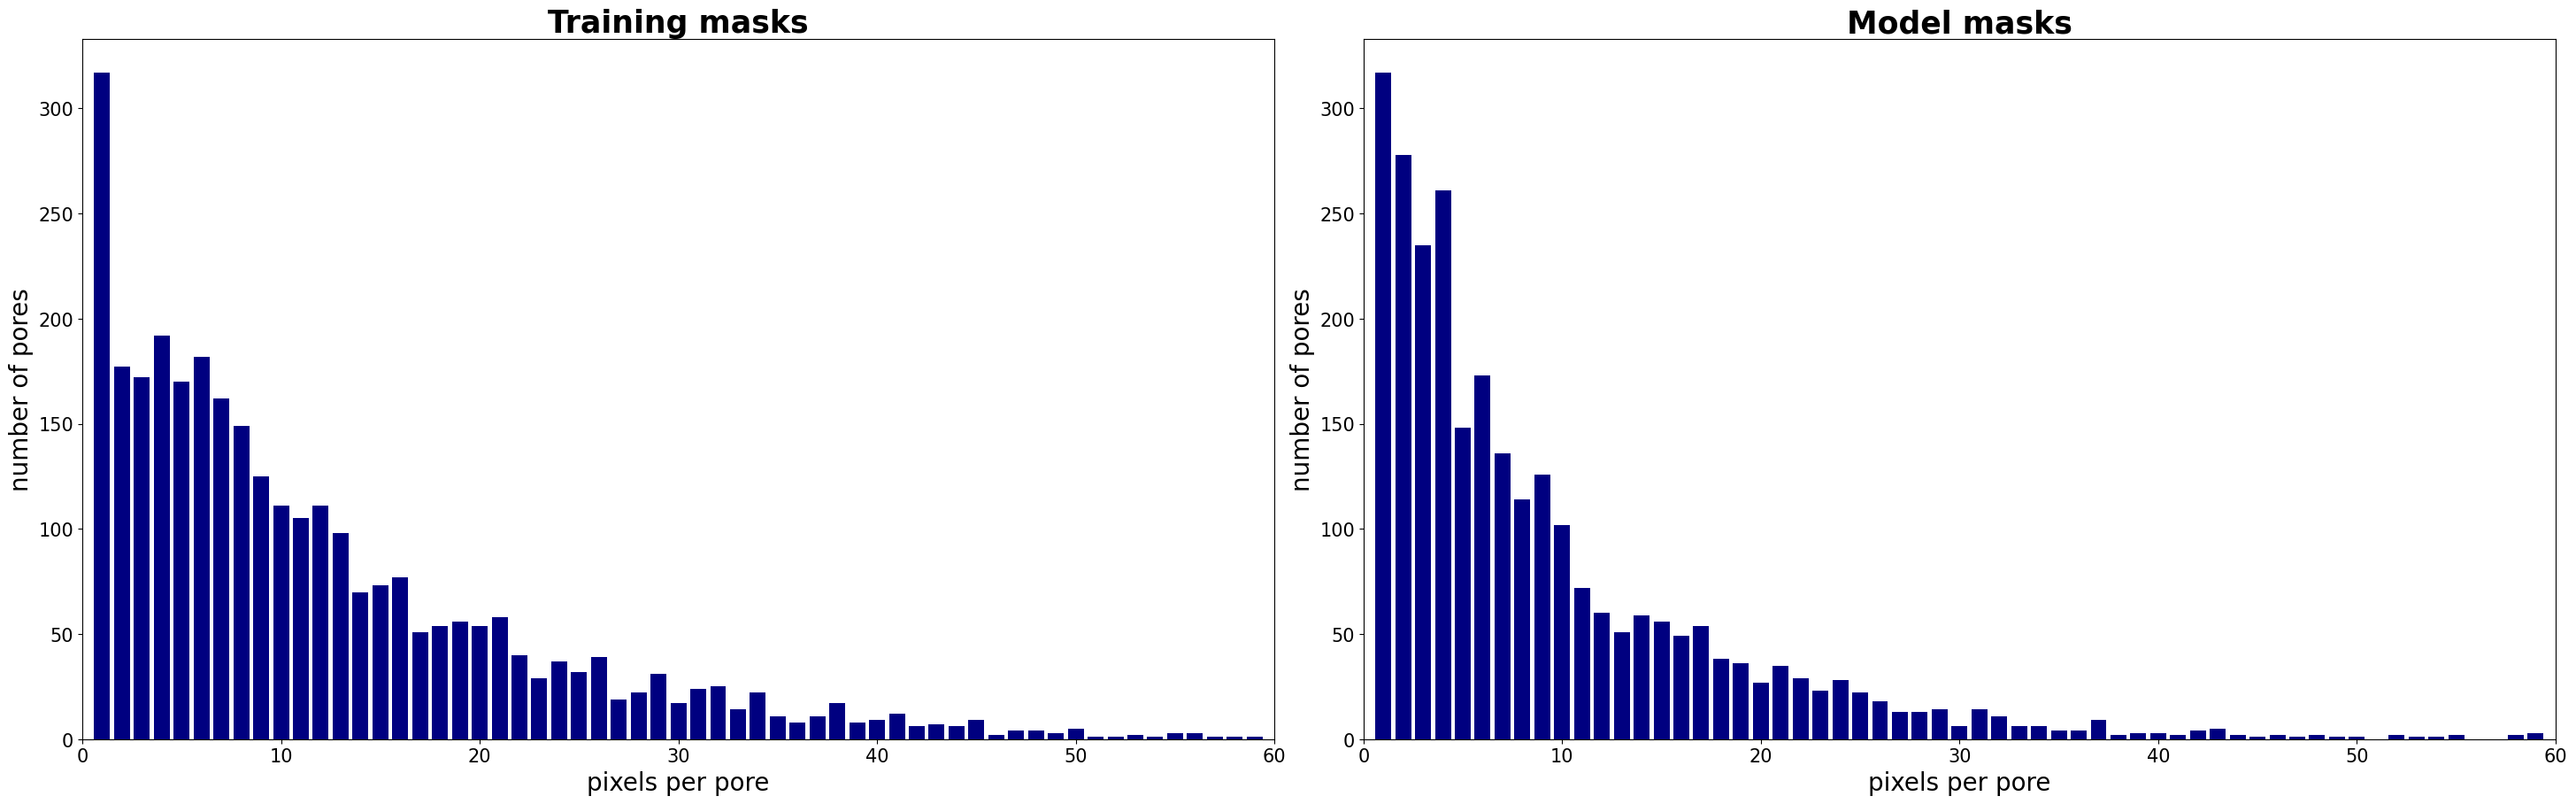

In [20]:
#code for plotting the comparison
def comparison(filename_a, filename_b, plotname):
    """
    Takes the json file with the counted holes and plots it using matplotlib
    Here the first filename is for the training mask data and the second one is for the model mask data

    Args:
        filename_a: string, the name of the file for the training mask data
        filename_b: string, the name of the file for the model mask data
        plotname: string, the name for the saved plot
    """
    #the plottitles are fixed
    with open(filename_a) as fa:
        dict_a = json.load(fa)
    area_a = list(dict_a.keys())
    area_a_int = list(map(int, area_a))
    area_a_s = sorted(area_a_int)
    n_a = list(dict_a.values())
  
    with open(filename_b) as fb:
        dict_b = json.load(fb)
    area_b = list(dict_b.keys())
    area_b_int = list(map(int, area_b))
    area_b_s = sorted(area_b_int)
    n_b = list(dict_b.values())
    
    plt.figure(figsize=(30,10))
    
    #plot 1
    plt.subplot(1,2,1)
    plt.tight_layout(pad = 4)
    plt.bar(x = area_a_int, height = n_a, color = 'navy')
    plt.xlabel("pixels per pore", fontsize = 20)
    plt.ylabel("number of pores", fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlim(0,60)
    plt.title("Training masks", fontsize = 25, weight = 'bold')

    #plot 2
    plt.subplot(1,2,2)
    plt.tight_layout(pad = 4)
    plt.bar(x = area_b_int, height = n_b, color = 'navy')
    plt.xlabel("pixels per pore", fontsize = 20)
    plt.ylabel("number of pores", fontsize = 20)
    plt.xticks(fontsize = 15)
    plt.yticks(fontsize = 15)
    plt.xlim(0,60)
    plt.title("Model masks", fontsize = 25, weight = 'bold')
    
    plt.savefig(plotname)

comparison("Affinity_masks.json","Model_masks.json", "Auswertung/comparison.png")

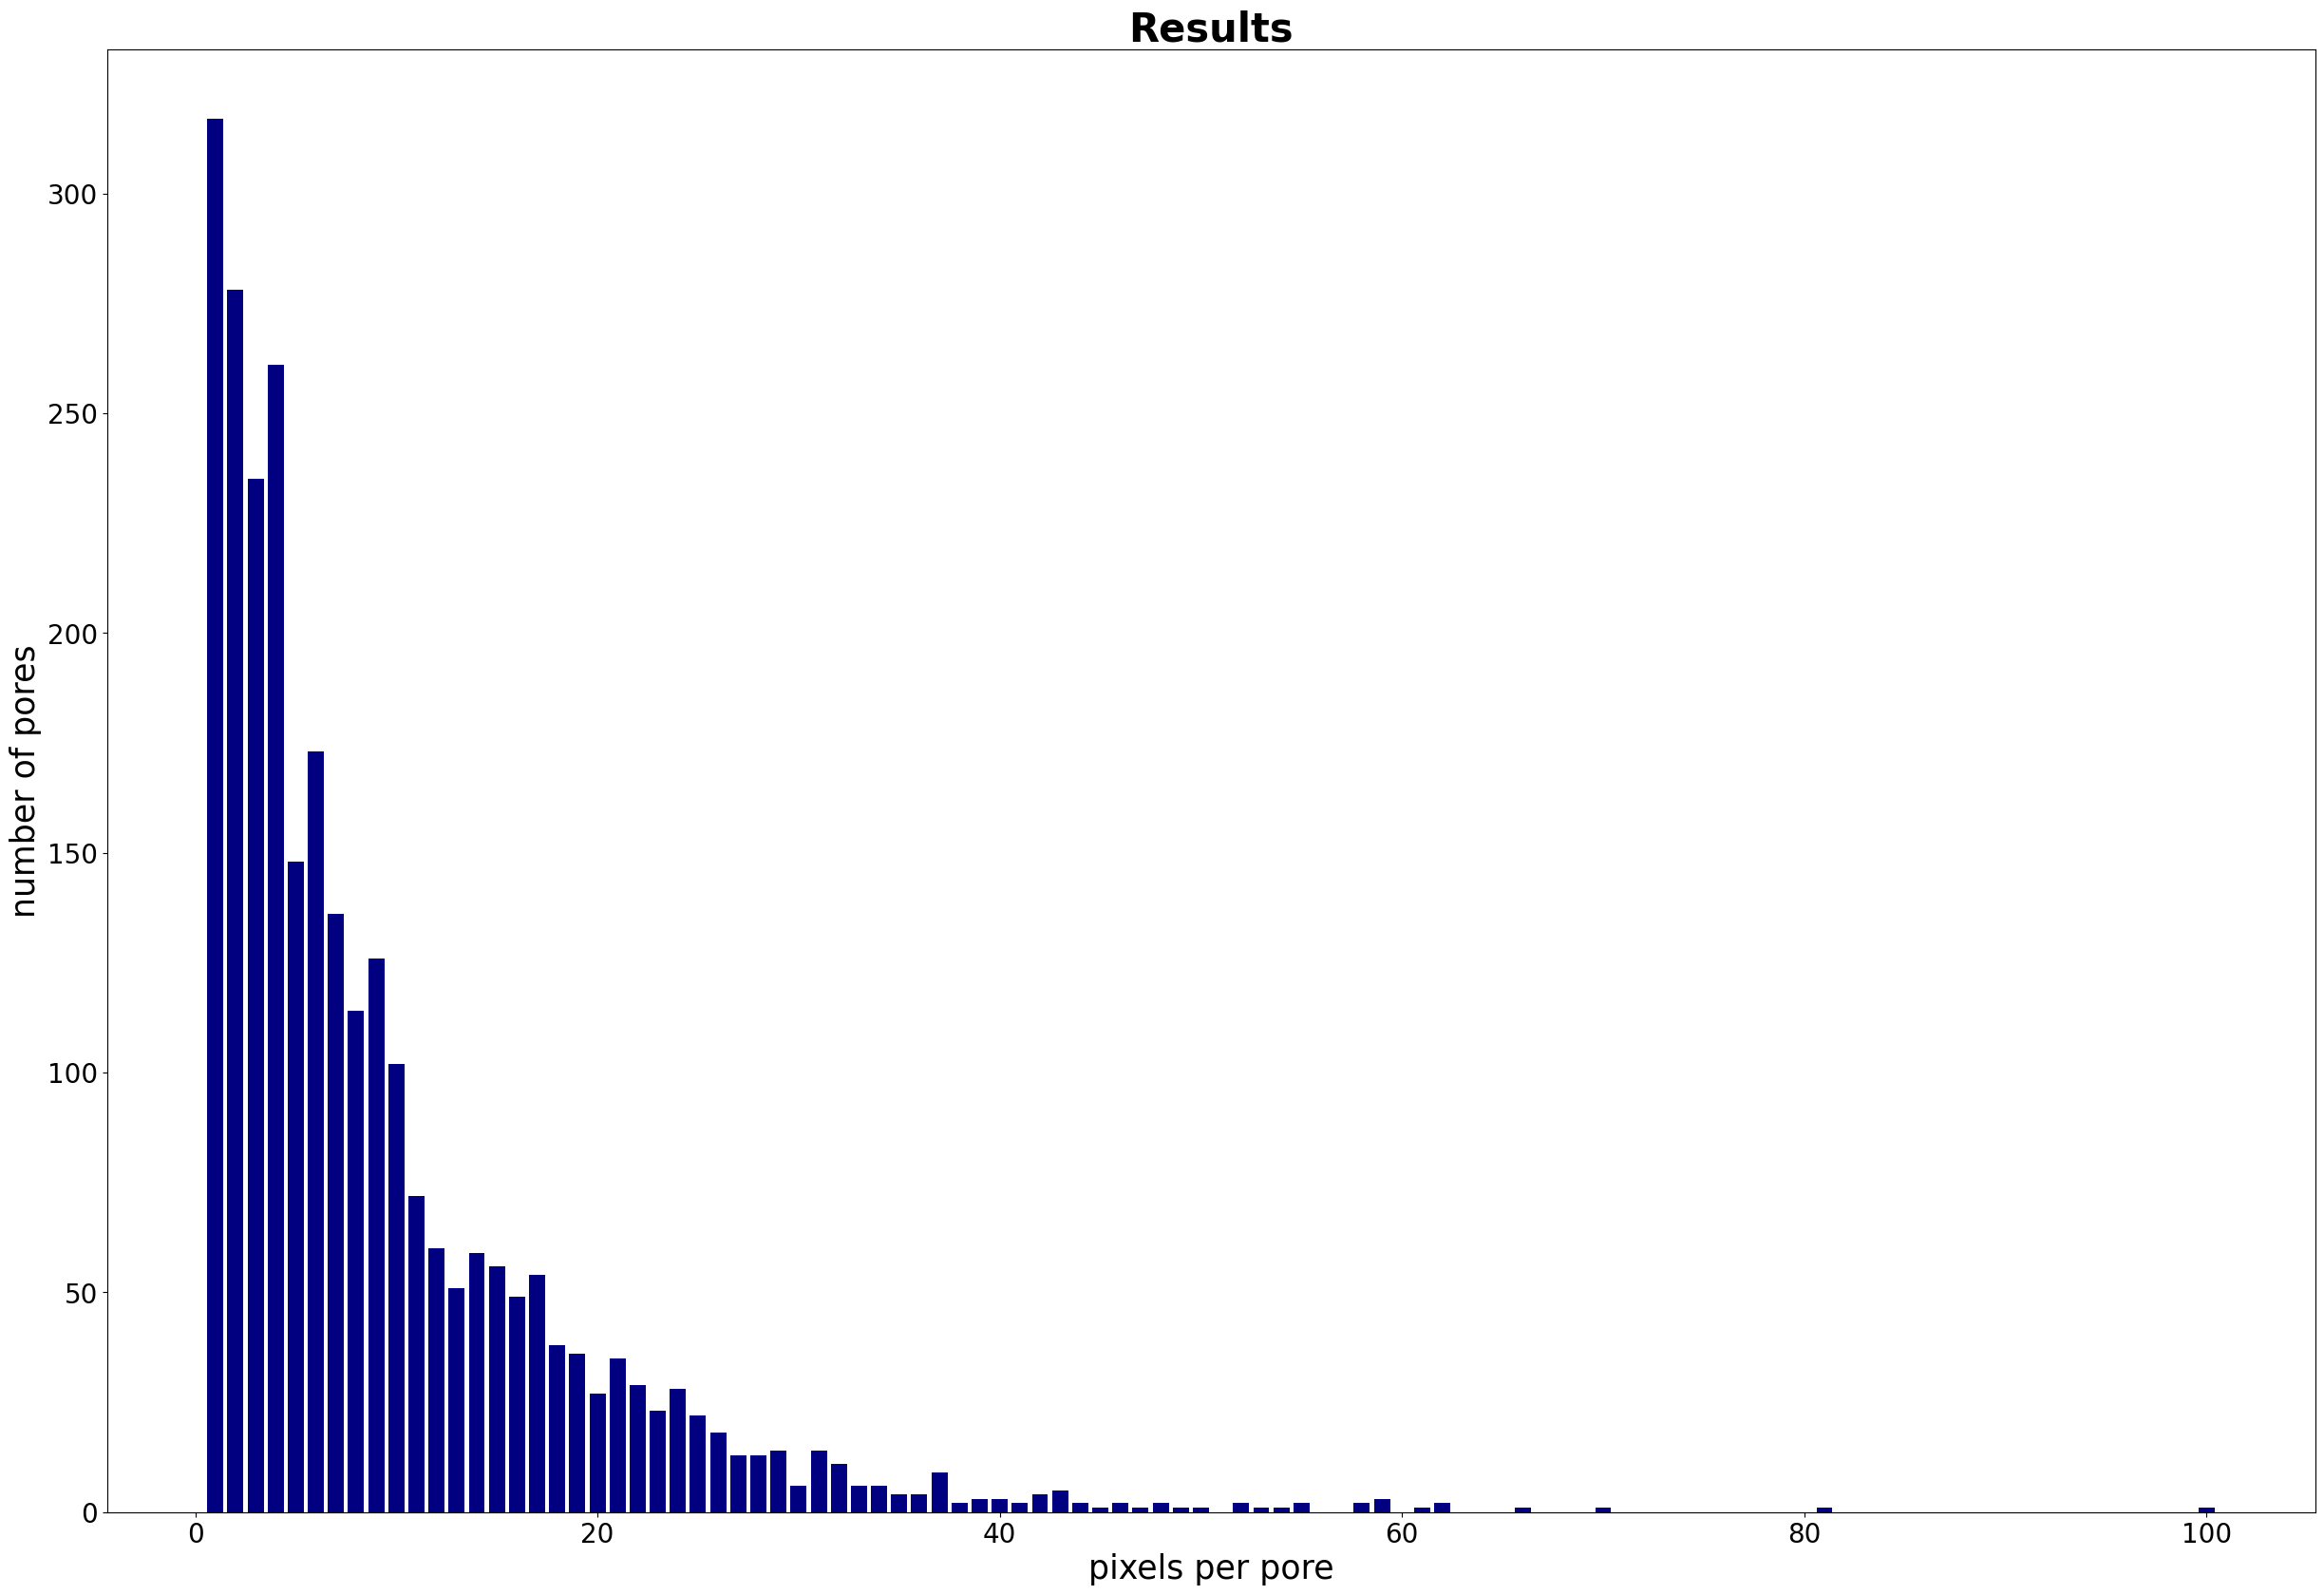

In [21]:
#code for plotting the results
def plotting(filename, plotname):
    """
    Takes the json file with the counted holes and plots it using matplotlib

    Args:
        filename: string, the name of the file for the data
        plotname: string, the name for the saved plot
    """
    #the plottitles are fixed
    with open(filename) as f:
        dict = json.load(f)
    area = list(dict.keys())
    area_int = list(map(int, area))
    n = list(dict.values())

    plt.figure(figsize=(30,20))
    plt.tight_layout()
    plt.bar(x = area_int, height = n, color = 'navy')
    plt.xlabel("pixels per pore", fontsize = 25)
    plt.ylabel("number of pores", fontsize = 25)
    plt.xticks(fontsize = 20)
    plt.yticks(fontsize = 20)
    plt.title("Results", fontsize = 30, weight = 'bold')

    plt.savefig(plotname)

plotting("Model_masks.json", "Auswertung/Model.png")